### PCA AND GMM


In [13]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import LogNorm
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
from scipy.stats import multivariate_normal    
import seaborn as sns
import pymc as pm
import arviz as az
import graphviz


In [2]:
# load the MNIST data
X_mnist, y_mnist = fetch_openml(name='Fashion-MNIST',return_X_y=True, as_frame=False)

In [19]:
df = pd.DataFrame(X_mnist)
df['labels'] = y_mnist
df['label2'] = y_labels
df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,labels,label2
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,9
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,8
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,7
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,9
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8,9
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [4]:
#https://www.youtube.com/watch?v=oiusrJ0btwA
X_mnist = X_mnist / 255
pca = PCA(n_components=2) #maybe change n_components=2 
pca.fit(X_mnist)

PCA(n_components=2)

In [5]:
scores = pca.transform(X_mnist)

scaler = StandardScaler()
# scores_df = pd.DataFrame(scaler.fit_transform(scores_df))
df = pd.DataFrame(scores, columns=['PC1', 'PC2'])
# ##reminder to scale it later
# df
scores_df = pd.DataFrame(scaler.fit_transform(df), columns=['PC1', 'PC2'])
scores_df

,PC1,PC2
0,-0.111462,1.840876
1,1.240207,-0.509356
2,-0.639178,-1.244515
3,0.027805,-1.107247
4,0.708818,-1.355463
...,...,...
69995,-0.514016,1.500882
69996,-0.816626,-1.425417
69997,-0.449899,-0.819768
69998,-0.194715,-1.592841


In [20]:
explained_variance = pca.explained_variance_ratio_
explained_variance
#calculating the values and putting it into a pd framework
pc_df = pd.DataFrame(['', 'PC1', 'PC2'], columns=['PC'])
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)

fig = px.bar(df_explained_variance,
            x='PC', y='Explained Variance',
            text='Explained Variance',
            width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside') #puts the values outside the bar
fig.show()

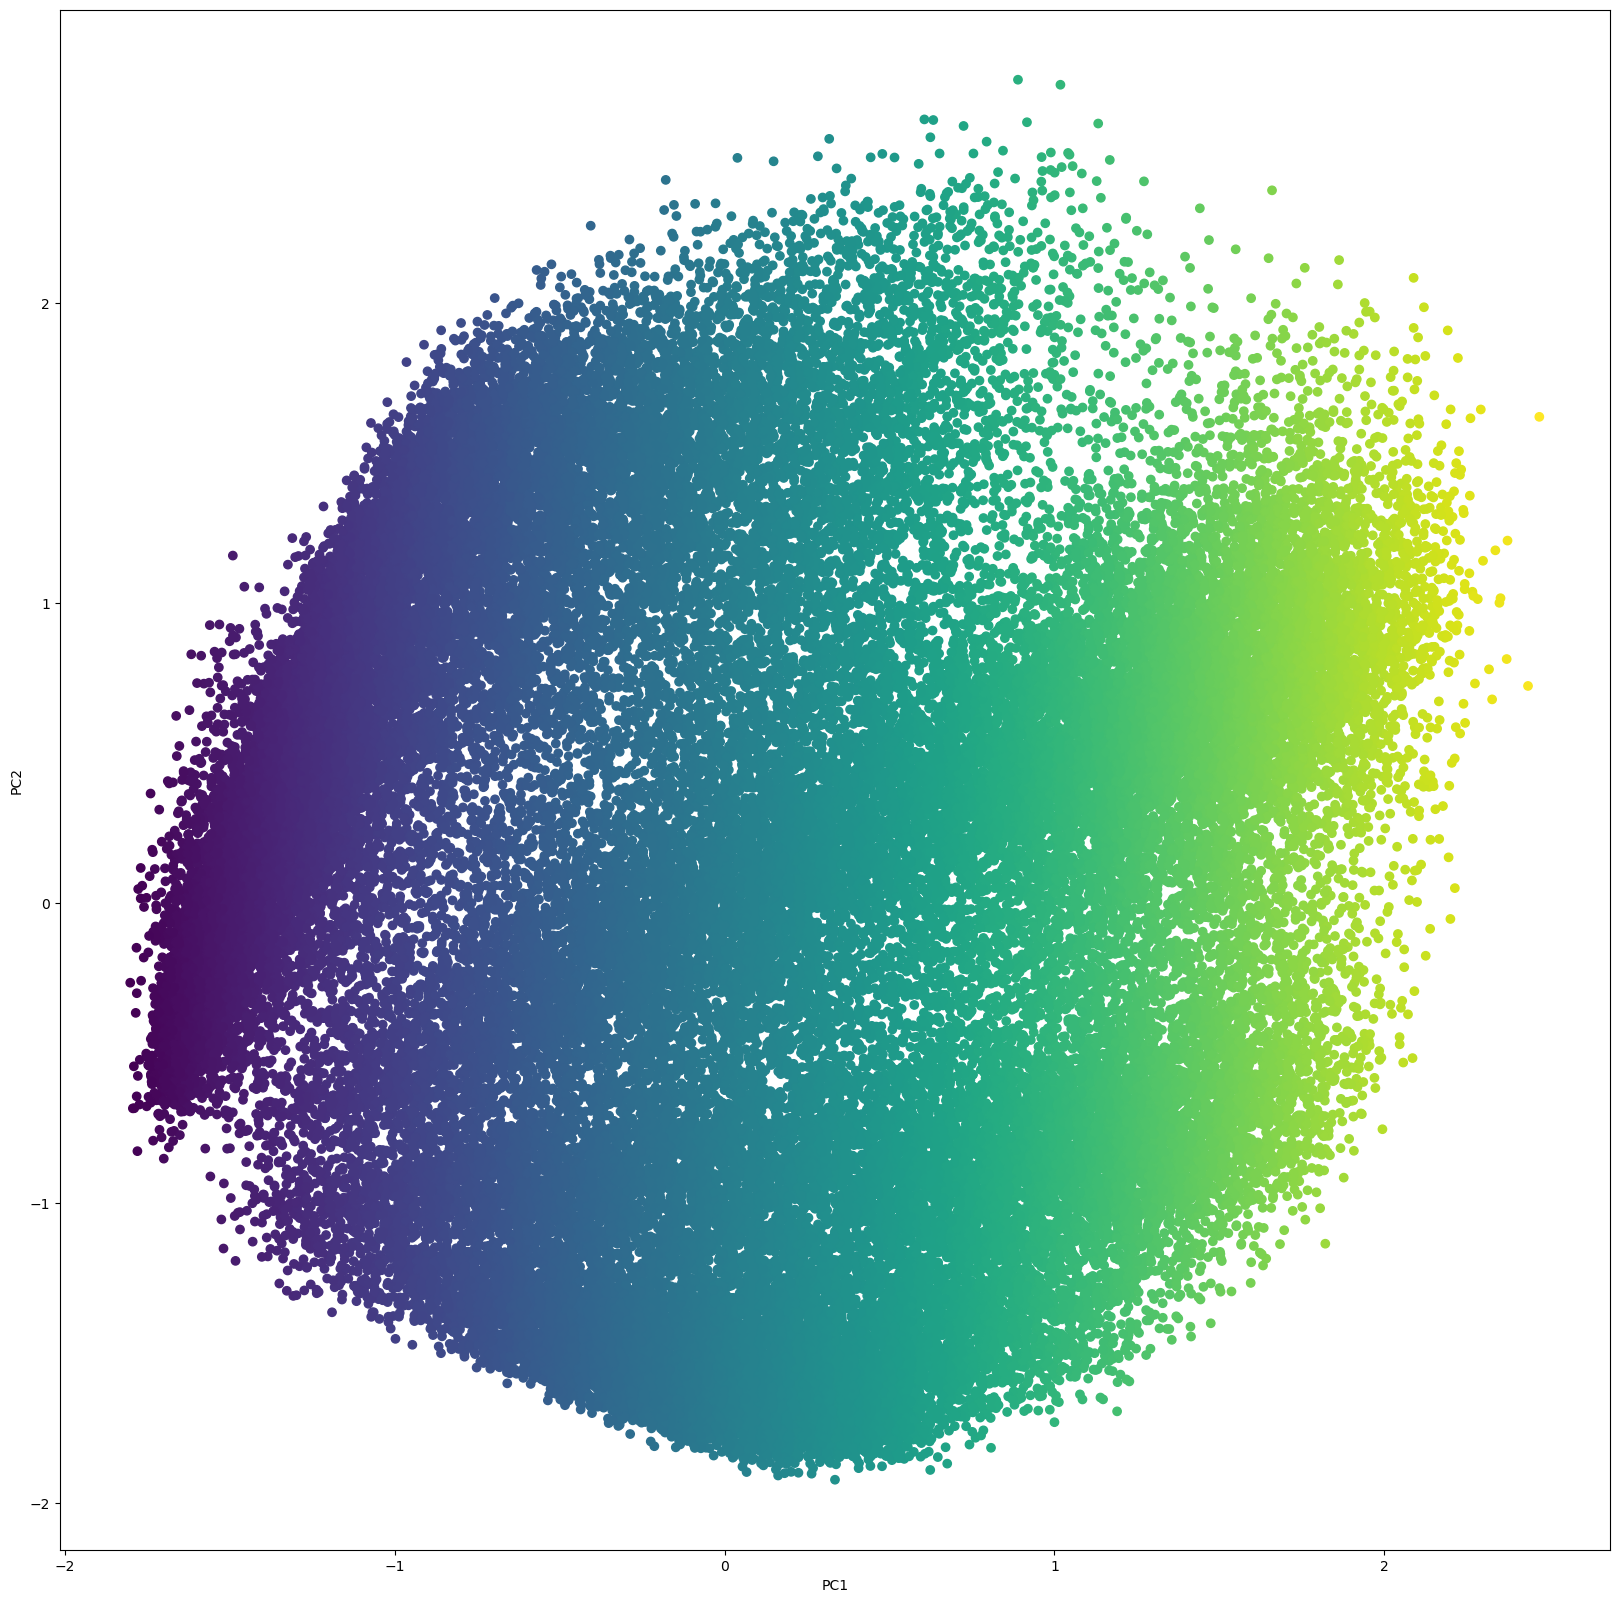

In [21]:
#2.1.1 q2
pc1_array = np.array(scores_df['PC1'])
pc2_array = np.array(scores_df['PC2'])
plt.figure(figsize=(20,20))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pc1_array, pc2_array, c=pc1_array)
plt.show()
#remember to add points to the data

In [8]:
#2.1.2
GMM_model = GaussianMixture(n_components=10, max_iter=300)
X_data = np.array(scores_df)
GMM_model.fit(X_data)


GaussianMixture(max_iter=300, n_components=10)

In [9]:
GMM_labels = GMM_model.predict(X_data)
GMM_test = GMM_model.predict_proba(X_data)
GMM_test.shape
# plt.scatter(GMM_test[0], GMM_test[:,1], c=GMM_test[:,1])
# plt.scatter(X_data[:,0], X_data[:,1], c='GMM_labels')

(70000, 10)

TypeError: 'NoneType' object is not callable

In [126]:
data = scores_df
data['cluster'] = y_labels

# for row in data.rows:
#     data_cluster_0 = data[data[['cluster' == i]]
for i in range(9):
    data_cluster0 = data[data['cluster'] == i]
    print(np.mean(data_cluster0))
#     print(data[data_cluster0.mean()['PC1']])
#     print(np.array(data_cluster0.mean()))

# new_df = np.array(data_cluster0.mean())

PC1        0.115229
PC2        1.513203
cluster    0.000000
dtype: float64
PC1        0.036950
PC2       -1.601091
cluster    1.000000
dtype: float64
PC1        1.111989
PC2        0.438161
cluster    2.000000
dtype: float64
PC1       -1.412659
PC2        0.203169
cluster    3.000000
dtype: float64
PC1        1.017192
PC2       -0.869793
cluster    4.000000
dtype: float64
PC1        1.643435
PC2        0.901077
cluster    5.000000
dtype: float64
PC1        0.312122
PC2        0.322331
cluster    6.000000
dtype: float64
PC1       -0.846647
PC2        1.171834
cluster    7.000000
dtype: float64
PC1       -0.305735
PC2       -0.336190
cluster    8.000000
dtype: float64


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



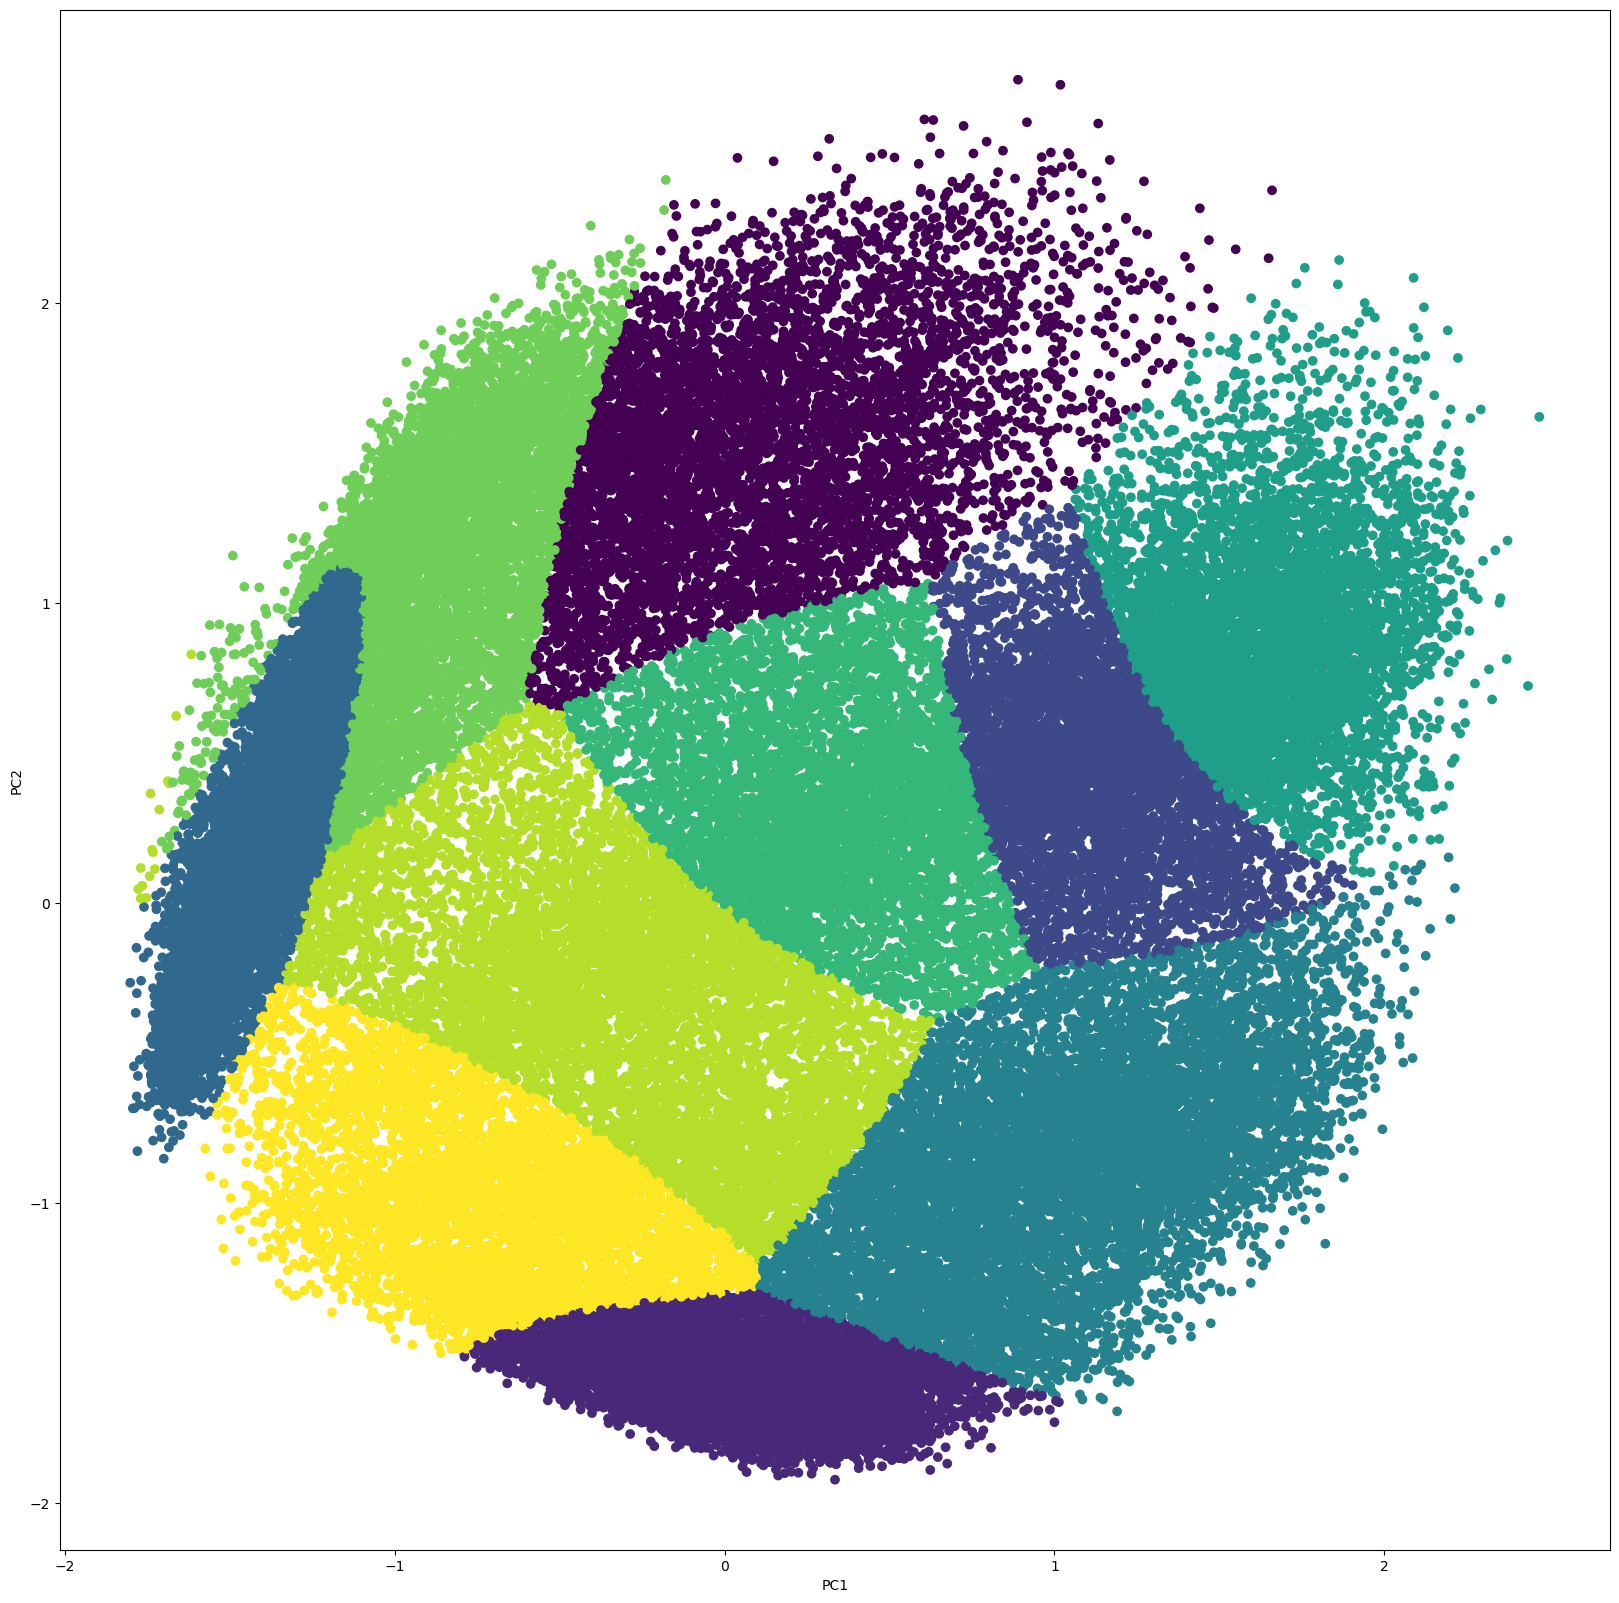

In [125]:
y_labels = GMM_model.predict(X_data)
pc1_array = np.array(scores_df['PC1'])
pc2_array = np.array(scores_df['PC2'])
plt.figure(figsize=(20,20))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pc1_array, pc2_array, c=y_labels)
plt.show()

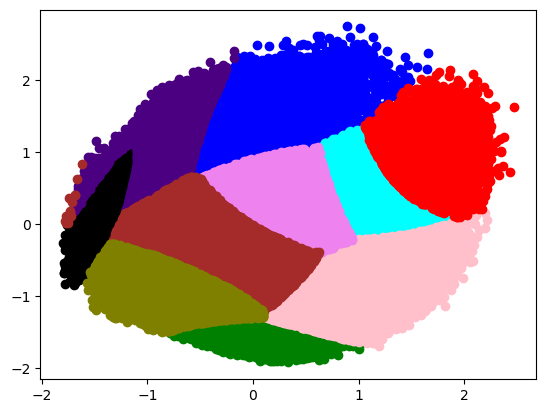

In [124]:
frame = pd.DataFrame(X_data)
frame['cluster'] = GMM_labels
frame.columns = ['GMM1', 'GMM2', 'cluster']
color=['blue','green','cyan', 'black', 'pink', 'red', 'violet', 'indigo', 'brown', 'olive']
for k in range(0,10):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["GMM1"],data["GMM2"],c=color[k])
plt.show()
